# Problem Statement
You are consulting for a real estate company that has a niche in purchasing properties to rent out short-term as part of their business model specifically within New York City. The real estate company has already concluded that two bedroom properties are the most profitable; however, they do not know which zip codes are the best to invest in.

# Objective

The objective of this Data Challenge is to analyze the Airbnb and Zillow datasets for a real estate client, and suggest the most profitable zipcodes in New York city at which 2 bhks can be purchased and rented out on a short term.

<i><u>What is being addressed:</u></i>

* <b>Quality Check:</b> The real world datasets contains several inconsistencies that will be dealt with.           
* <b>Data Munging:</b> This section concentrates on linking and making the data homogeneous in terms of units, in a scalable manner.                                                                                                   
* <b>Visual Data Narration:</b> This sections provides charts and important Business points on most profitable zipcodes.                                                                                                           
* <b>What's Next:</b> This chunk concentrates on providing further business insights into how the client can achieve greater profits by employing the suggested strategies.

# Assumptions

* The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).
* The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).
* All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale.)
* Occupancy rate of 75% annually
* I am not including cleaning fee in my final year revenue generated by the property because after each use owner of the property has to clean the property and some kind of wear and tear with time.

# Quality Check

### Loading required packages

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Zillow data and AirBnB listings in python

In [7]:
zillow= pd.read_csv("/Users/newzysharma/Downloads/CapitalOne/DA-master/Zip_Zhvi_2bedroom.csv")
abnb1 = pd.read_csv("/Users/newzysharma/Downloads/CapitalOne/DA-master/listings file 1 of 4.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Zillow Analysis 

In [8]:
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61627,10013,New York,NY,New York,New York,1744,NaN,NaN,NaN,...,3347100,3305500,3261100,3244000.0,3231400,3183300,3160200,3193500,3262200,3316500
1,61628,10014,New York,NY,New York,New York,379,NaN,NaN,NaN,...,2480800,2443200,2430100,2452900.0,2451200,2441900,2460900,2494900,2498400,2491600
2,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
3,97515,94024,Los Altos,CA,San Jose,Santa Clara,4335,419500.0,422300.0,430400.0,...,2330300,2302700,2269300,2263600.0,2279300,2302700,2321700,2351200,2371500,2378100
4,97519,94028,Portola Valley,CA,San Francisco,San Mateo,7158,NaN,NaN,NaN,...,2350800,2336500,2317200,2313800.0,2324200,2317300,2294500,2296300,2329400,2358300


In [9]:
zillow.shape

(8946, 262)

In [10]:
zillow_nyc = zillow[zillow['City'] == 'New York'] 

In [11]:
zillow_nyc.shape

(25, 262)

In [12]:
date_value = zillow_nyc.iloc[:,7:]
date_value_transposed = date_value.T
date_value_transposed.shape

(255, 25)

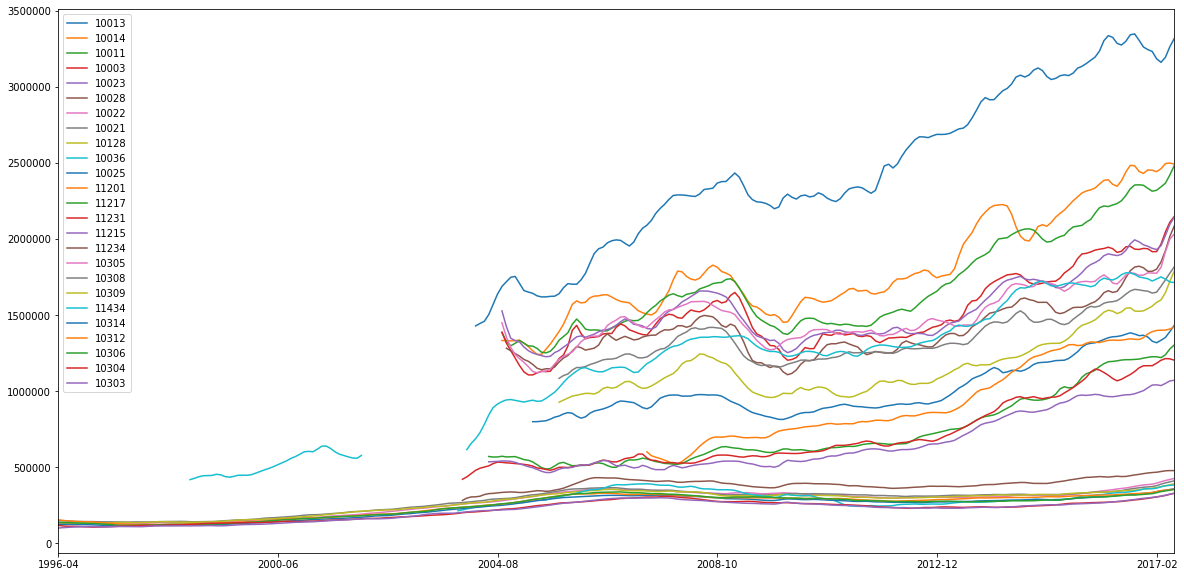

In [13]:
fig, ax = plt.subplots()
date_value_transposed.plot(figsize=(20, 10), ax= ax);
ax.legend(zillow_nyc['RegionName'])

<b><i>If we see most of the data till 2004-08 is missing and even after 2004 till 2017 the price of the properties does not increase much as compared to the previous years for respective areas. 
We can consider the data of later than 2004 due to large number of missing values, not major change in price for most of areas in New York city.</i></b>

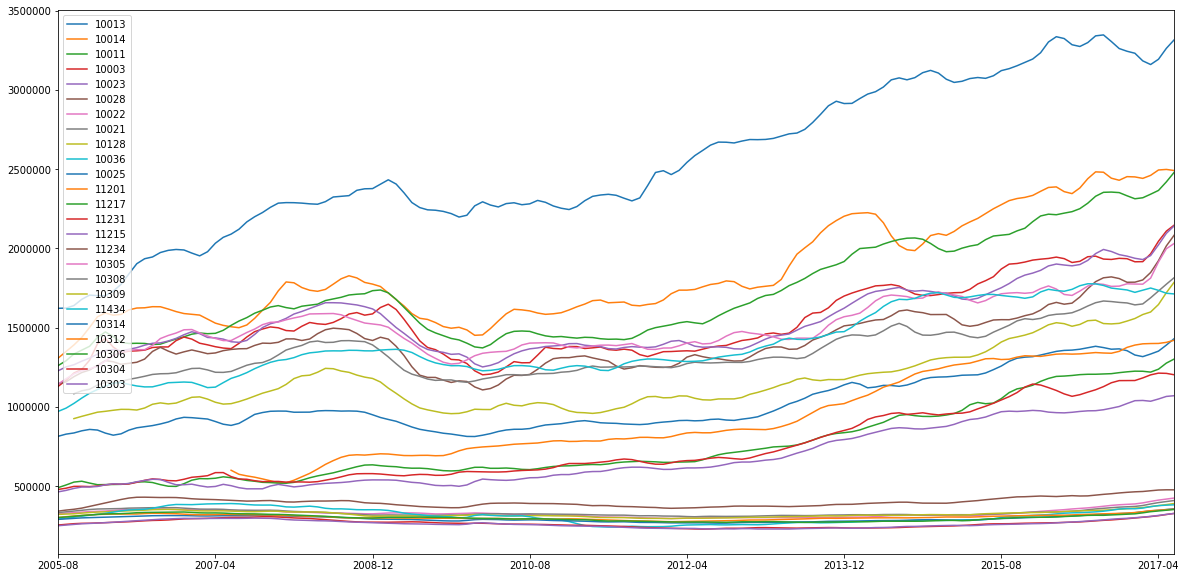

In [14]:
# date_value_transposed.loc['2005-08':]
fig, ax = plt.subplots()
date_value_transposed.loc['2005-08':].plot(figsize=(20, 10), ax= ax);
ax.legend(zillow_nyc['RegionName'])

<b><i>If we observe form the above graph, we will find out that over the period of almost 12 years prices in most of the regions in NYC does change dramatically as compared to their previous year, We can compare the median value over the years for all the region which gives us more better understanding of prices in the regions.</i></b>

[Text(0, 0, '10013'),
 Text(0, 0, '10014'),
 Text(0, 0, '10011'),
 Text(0, 0, '10003'),
 Text(0, 0, '10023'),
 Text(0, 0, '10028'),
 Text(0, 0, '10022'),
 Text(0, 0, '10021'),
 Text(0, 0, '10128'),
 Text(0, 0, '10036'),
 Text(0, 0, '10025'),
 Text(0, 0, '11201'),
 Text(0, 0, '11217'),
 Text(0, 0, '11231'),
 Text(0, 0, '11215'),
 Text(0, 0, '11234'),
 Text(0, 0, '10305'),
 Text(0, 0, '10308'),
 Text(0, 0, '10309'),
 Text(0, 0, '11434'),
 Text(0, 0, '10314'),
 Text(0, 0, '10312'),
 Text(0, 0, '10306'),
 Text(0, 0, '10304'),
 Text(0, 0, '10303')]

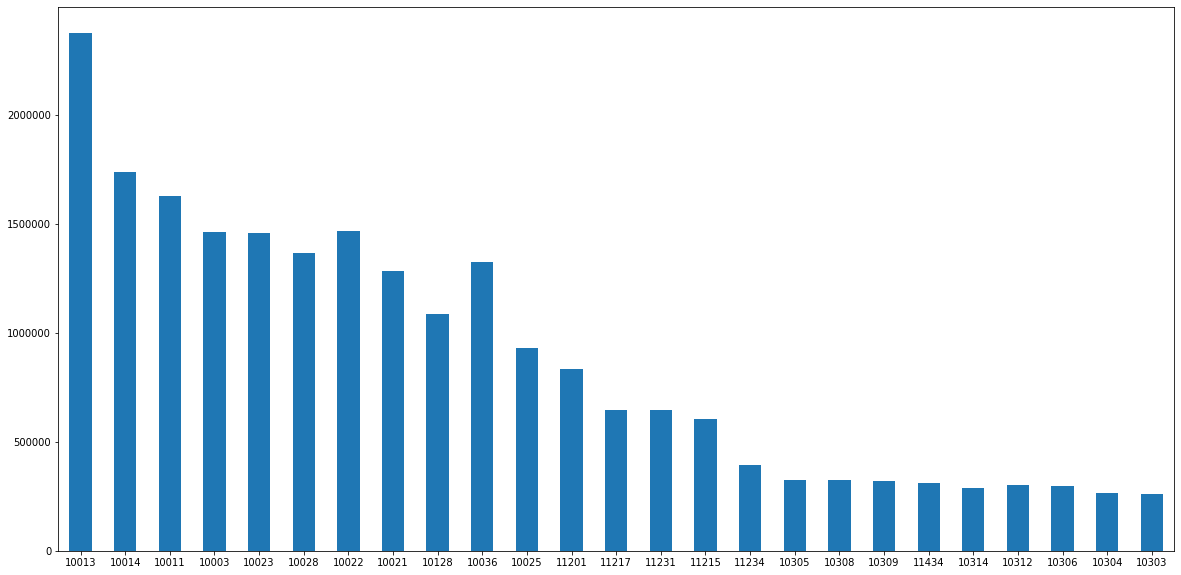

In [15]:
# date_value_transposed.median()
fig, ax = plt.subplots()
date_value_transposed.loc['2005-08':].median().plot(kind = 'bar', figsize=(20, 10), ax= ax);
ax.set_xticklabels(zillow_nyc['RegionName'], rotation=0)


## AirBnB Analysis

In [16]:
abnb1.shape

(9999, 95)

In [17]:
abnb1[abnb1['bedrooms'] == 2.0].shape

(1180, 95)

In [18]:
abnb1[abnb1['zipcode'].isin(zillow_nyc['RegionName'])].shape

(753, 95)

In [19]:
# Filtering Airbnb data for 2 bedroom and according to Zip codes mentioned in Zillow dataset
abnbFilter = abnb1[abnb1['bedrooms'] == 2.0]
abnbFilter = abnbFilter[abnbFilter['zipcode'].isin(zillow_nyc['RegionName'])]

In [20]:
abnbFilter.shape

(94, 95)

In [21]:
abnbFilter.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Data Munging

All the columns realted to the Amount have "$" symbol, so I have removed the symbol from each of the column and converted the respective column type to float to do further analysis.

In [22]:
abnbFilter['price'] = abnbFilter['price'].str.replace('$', '').str.replace(',','')
abnbFilter['price'] = abnbFilter['price'].astype(float)

abnbFilter['security_deposit'] = abnbFilter['security_deposit'].str.replace('$', '').str.replace(',','')
abnbFilter['security_deposit'] = abnbFilter['security_deposit'].astype(float)

abnbFilter['cleaning_fee'] = abnbFilter['cleaning_fee'].str.replace('$', '').str.replace(',','')
abnbFilter['cleaning_fee'] = abnbFilter['cleaning_fee'].astype(float)

abnbFilter['weekly_price'] = abnbFilter['weekly_price'].str.replace('$', '').str.replace(',','')
abnbFilter['weekly_price'] = abnbFilter['weekly_price'].astype(float)

abnbFilter['monthly_price'] = abnbFilter['monthly_price'].str.replace('$', '').str.replace(',','')
abnbFilter['monthly_price'] = abnbFilter['monthly_price'].astype(float)

## Feature Selection

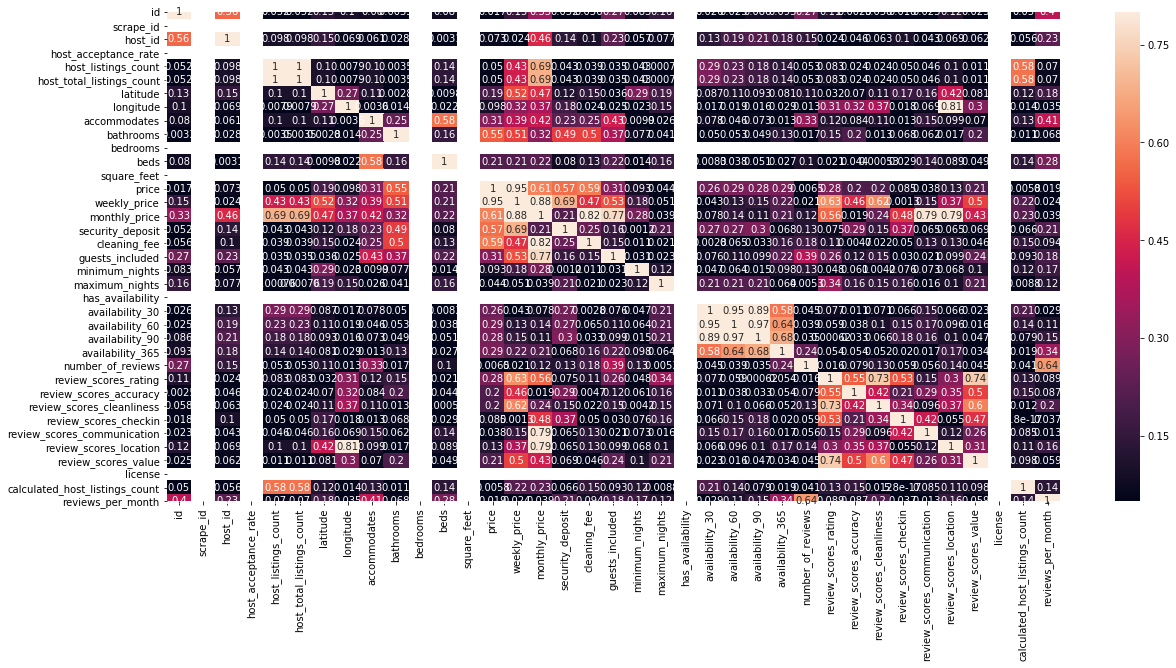

In [23]:
corr_matrix = abnbFilter.corr()
corr_matrix = abs(corr_matrix)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr_matrix, vmax=0.8, vmin=0.05, annot=True)

In [24]:
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
weekly_price                      0.951880
monthly_price                     0.605804
cleaning_fee                      0.592102
security_deposit                  0.573993
bathrooms                         0.546197
accommodates                      0.307799
guests_included                   0.307208
availability_365                  0.286685
availability_60                   0.285308
review_scores_rating              0.284888
availability_90                   0.279299
availability_30                   0.263432
beds                              0.212331
review_scores_value               0.205917
review_scores_accuracy            0.203748
review_scores_cleanliness         0.197079
latitude                          0.190696
review_scores_location            0.128568
longitude                         0.098214
minimum_nights                    0.093074
review_scores_checkin             0.084902
host_id                           0.072780
host_listin

In [25]:
# Let us check number of nnull values for some columns that are highly co-related with price
abnbFilter[['weekly_price', 'monthly_price', 'cleaning_fee', 'security_deposit']].isna().sum()

weekly_price        75
monthly_price       84
cleaning_fee        16
security_deposit    42
dtype: int64

If we see from the above co-relation matrix, an help us selecting some of the important features that could have an impact on determining the price. We can observe columns like weekly_price, cleaning_fee, security_deposits are highly co-related with our main feature i.e. price. But the 2 highly related features i.e. weekly_price and monthly_price have large number of null values.  
Apart from the co-relation matrix we can select some features that we can think can impact the price.

In [26]:
# Filtering out important features for our final dataset
abnbFinal = abnbFilter[['zipcode', 'street', 'city', 'neighbourhood_group_cleansed','bathrooms',
       'smart_location', 'latitude', 'longitude', 'accommodates','price', 'security_deposit',
        'cleaning_fee', 'availability_30', 'availability_60', 'availability_365', 'availability_90',
        'number_of_reviews','review_scores_rating', 'review_scores_location', 'review_scores_value',
        'cancellation_policy']]
abnbFinal = abnbFinal.reset_index(drop=True)

In [27]:
abnbFinal.shape

(94, 21)

## Data Cleaning

In [28]:
abnbFinal.isna().sum()

zipcode                          0
street                           0
city                             0
neighbourhood_group_cleansed     0
bathrooms                        1
smart_location                   0
latitude                         0
longitude                        0
accommodates                     0
price                            0
security_deposit                42
cleaning_fee                    16
availability_30                  0
availability_60                  0
availability_365                 0
availability_90                  0
number_of_reviews                0
review_scores_rating            19
review_scores_location          19
review_scores_value             19
cancellation_policy              0
dtype: int64

Since some of the values in cleaning fee and security deposit are Null and we have certain number of options how we can replace those null values:  
1. We can replace the null values with the average cleaning fee in that area(zipcode), but this is not good metric because its possible if all cleaning fee value in that area are null or if some houses have very low price and some have high, then there would be discrepancy. 

2. Another approach which I find more suitable is we can take the average of fraction of cleaning_value to the price/rent of the apartment. 

In [29]:
meanCleaning = (abnbFinal['cleaning_fee']/abnbFinal['price']).mean()
meanCleaning = float(format(meanCleaning, ".2f"))

In [30]:
meanCleaning

0.37

In [31]:
for i in range(len(abnbFinal)):
    if np.isnan(abnbFinal['cleaning_fee'][i]):
        abnbFinal['cleaning_fee'][i] = abnbFinal['price'][i] * meanCleaning

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Visual Data Narration

### Price of the listings according to the neighborhood 

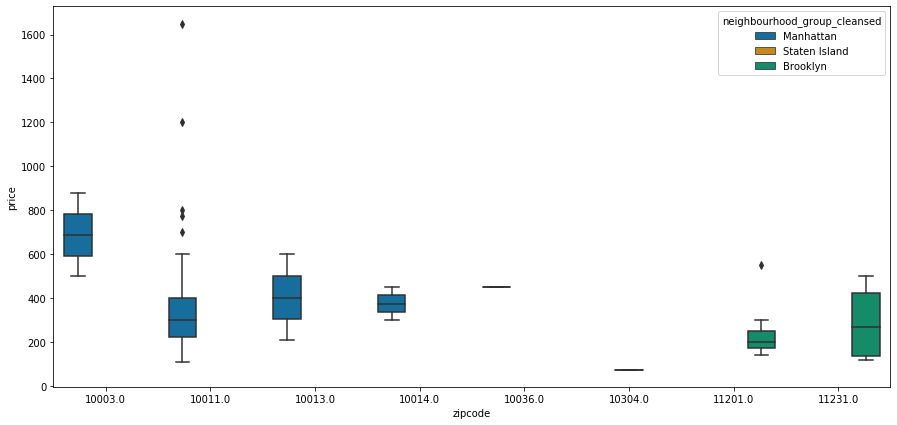

In [466]:
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(y='price', x='zipcode', 
                 data=abnbFinal, 
                 palette="colorblind",
                 hue='neighbourhood_group_cleansed', ax= ax)

In [34]:
abnbFinal[abnbFinal['neighbourhood_group_cleansed'] == 'Staten Island']['zipcode']

78    10304
Name: zipcode, dtype: object

The plot above shows the distribution of price per day for the property in different zipcodes and in what neighborhood the zip code exist. Most of the expensive properties are in the Manhattan area of New york and primarily the area having zip code 10003 is have most expensive property on an average while there are 2 properties in 10011 area that are really expensive.

### Number of Properties in each area (Zip Code)

Text(0, 0.5, 'Property Count')

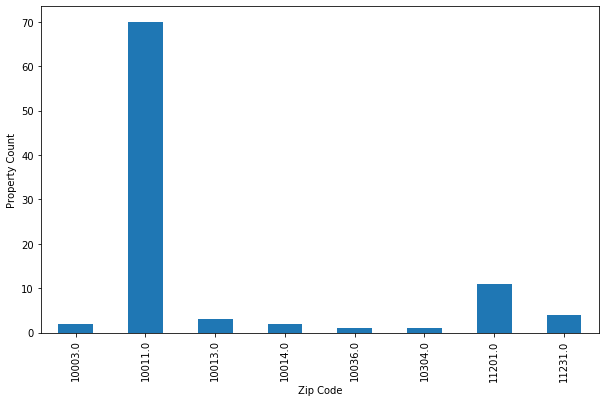

In [77]:
abnbFinal.groupby(['zipcode']).size().plot(kind = 'bar', figsize = (10, 6))
plt.xlabel("Zip Code")
plt.ylabel("Property Count")

In [441]:
nbrGroup = abnbFinal.groupby(['neighbourhood_group_cleansed', 'zipcode']).agg({'neighbourhood_group_cleansed': 'first',
                                                                'zipcode': 'first', 'price': 'mean' }).reset_index(drop=True)

In [442]:
nbrGroup

,neighbourhood_group_cleansed,zipcode,price
0,Brooklyn,11201.0,234.090909
1,Brooklyn,11231.0,290.000000
2,Manhattan,10003.0,688.500000
3,Manhattan,10011.0,356.957143
4,Manhattan,10013.0,402.666667
5,Manhattan,10014.0,375.000000
6,Manhattan,10036.0,450.000000
7,Staten Island,10304.0,75.000000


### Occupancy Rate
Considering the occupancy rate to be 75% and calculating the price each property will give each year.  
In my case, I am not including cleaning fee in my final year revenue generated by the property because after each use owner of the property has to clean the property and some kind of wear and tear with time.

In [68]:
occupancy = .75
abnbFinal['yearPrice'] = abnbFinal['price'] * 365 * occupancy

I am considering the latest porperty prices from the Zillow data to see which properties will start generating the revenues at the earliest as we have seen above(Zillow Analysis) as well that there were slight changes(majorly slight increase) in the property prices over past couple of years and for our analysis it makes more sense if we consider the current property prices in the area.

In [69]:
price_2017 = zillow_nyc['2017-06']

In [70]:
df = pd.concat([zillow_nyc['2017-06'], zillow_nyc['RegionName']], axis = 1)
df = df.rename(columns={"RegionName": "zipcode", '2017-06': 'PropertyPrice'})

In [71]:
#Median revenue generated by property in particular zipcode in AirBnB data
priceZip = abnbFinal.groupby(['zipcode']).agg({'yearPrice': 'median', 'zipcode': 'first'}).reset_index(drop=True)

In [72]:
# Merging the Zillow data with our AirBnB data
df = pd.merge(df, priceZip, how="outer")

In [73]:
# Converting the yearly revenue from property to 10 year revenue assuming the constant occupancy rate of 75% and 
# per day price to be reamin same over the period of 10 years
df['yearPrice'] = df['yearPrice']*10
df = df.rename(columns={"yearPrice": "YearlyRevenue"})

## Zip Codes as per generating Revenue

Text(0, 0.5, 'Price')

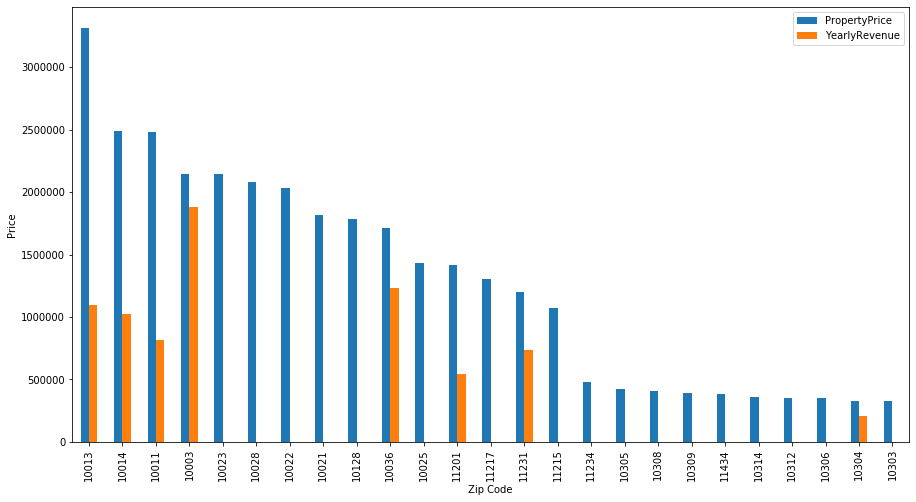

In [76]:
df.plot(x="zipcode", y=["PropertyPrice", "YearlyRevenue"], kind="bar", figsize=(15,8))
plt.xlabel("Zip Code")
plt.ylabel("Price")

In [78]:
df['YearlyRevenue'] = df['YearlyRevenue'].fillna(0.0)

In [80]:
df['ratio'] = df['YearlyRevenue']/ df['PropertyPrice']

In [81]:
top5 = df.sort_values(by = 'ratio', ascending = False)['zipcode'].head(5)

In [84]:
top5

3     10003
9     10036
23    10304
13    11231
1     10014
Name: zipcode, dtype: int64

# Conclusion:  
#### 1. Following are the 5 areas (Zip Code)- 10003, 10036, 10304, 11231, 10014, which will start generating the revenue earliest based on the data available.
#### 2. Another interetsing observation is if we see the graph showing number of propoerties in each zip code, we found that the top 3 properties from above having least number of properties and also properties in 10036 and 10304 have  property price less also. So, these could be really good propoerties to invest in.

# What's Next

#### 1. We can also calculate price on the basis of weekly price and yearly price based on the weights of number of booking made on daily, weekly or monthly basis but at this stage since most of the weekly and monthly prices are null and its not feasible to make assumption and also we are not given with the details of weights/ percentage of booking made for weeks or months.    

#### 2. Another thing we can do, we assume the per day price of the property will reamin over the period of time to calculate when our property will satrt generating profits. In future we can also calculate that revenue on the basis of changes in the price of property in the areas or according to the general inflation rate in the year. That way its a high possiblity that our properties will start generating profits more earlier then we have calculated above.
#### 3. NY being a financial capital has a scope for long term rentals. Hence, the properties can be rented out on a long term basis as well.
#### 4. As per the variables available in the data like ‘availability_30’, ‘availability_60’, ‘availability_90’ and ‘availability_365’, we can calculate the value for the occupancy rate. For Example, 30 days occupancy rate in percent = (No of days occupied in 30 days) * 100 / 30